# Trabajo Práctico N°3. Regresión Lineal

## Parte I
Del libro “Bishop, C. Pattern Recognition and machine learning” resolver los ejercicios 3.12, 3.13, 3.23, y 3.24.

### Ejercicio 3.12

Vimos en la sección 2.3.6 que el conjugado a priori para una distribución gaussiana con media desconocida y varianza desconocida es una distribución normal-gamma. Esta propiedad también se mantiene para el caso de la distribución gaussiana condicional $p(t|\mathbf{x}, \mathbf{w}, \beta)$ del modelo de regresión lineal. Si consideramos la función de verosimilitud (3.10), entonces el conjugado a priori para $\mathbf{w}$ y $\beta$ es 

$$ p(\mathbf{w}, \beta) = \mathcal{N}(\mathbf{w}|\mathbf{m}_0, \beta^{-1}\mathbf{S}_0)\text{Gam}(\beta|a_0, b_0) \tag{3.112}$$

Demuestre que la distribución a posteriori tiene la misma forma funcional, es decir,

$$ p(\mathbf{w}, \beta|t) = \mathcal{N}(\mathbf{w}|\mathbf{m}_N, \beta^{-1}\mathbf{S}_N)\text{Gam}(\beta|a_N, b_N) \tag{3.113}$$

y encuentre las expresiones para los parámetros a posteriori $\mathbf{m}_N$, $\mathbf{S}_N$, $a_N$, $b_N$.

Este ejercicio trata sobre la inferencia bayesiana completa para el modelo de regresión lineal con funciones base, donde tanto el vector de pesos $\mathbf{w}$ como la precisión del ruido $\beta$ son tratados como variables aleatorias desconocidas.

Comencemos por escribir la función de densidad de probabilidad a priori $p(\mathbf{w},\beta)$:

\begin{align*}
p(\mathbf{w},\beta) &= \mathcal{N}(\mathbf{w}|\mathbf{m}_0,\beta^{-1}\mathbf{S}_0) \text{Gam}(\beta|a_0,b_0) \qquad (*)
\end{align*}
expandimos las definiciones de las dos distribuciones que componen la distribución Normal-Gamma
\begin{align*}
p(\mathbf{w},\beta) &\propto \left(\frac{\beta}{|\mathbf{S}_0|}\right)^2 \text{exp}(-\frac{1}{2}(\mathbf{w}-\mathbf{m}_0)^T \beta\mathbf{S}_0^{-1}(\mathbf{w}-\mathbf{m}_0))b_0^{a_0}\beta^{a_0-1}\text{exp}(-b_0\beta)
\end{align*}


Y luego escribimos la función de verosimilitud $p(\mathbf{t}|\mathbf{X},\mathbf{w},\beta)$ :

\begin{align*}
p(\mathbf{t}|\mathbf{X},\mathbf{w},\beta) &= \prod_{n=1}^{N}\mathcal{N}(t_n|\mathbf{w}^T\mathbf{\Phi}(\mathbf{x}_n),\beta^{-1})\\
&\propto \prod_{n=1}^{N}\beta^{1/2}\text{exp}\left[-\frac{\beta}{2}(t_n-\mathbf{w}^T\mathbf{\Phi}(\mathbf{x}_n))^2\right] \qquad (**)\\

\end{align*}

Según la inferencia bayesiana, tenemos $p(\mathbf{w},\beta|\mathbf{t}) \propto p(\mathbf{t}|\mathbf{X},\mathbf{w},\beta)\times p(\mathbf{w},\beta)$.  
Nos enfocamos en el término cuadrático con respecto a $\mathbf{w}$ en el exponente.

\begin{align*}
\text{término cuadrático} &= -\frac{\beta}{2}\mathbf{w}^T\mathbf{S}_0^{-1}\mathbf{w} + \sum_{n=1}^{N}-\frac{\beta}{2}\mathbf{w}^T\mathbf{\Phi}(\mathbf{x}_n)\mathbf{\Phi}(\mathbf{x}_n)^T\mathbf{w} \\
&= -\frac{\beta}{2}\mathbf{w}^T\left[\mathbf{S}_0^{-1} + \sum_{n=1}^{N}\mathbf{\Phi}(\mathbf{x}_n)\mathbf{\Phi}(\mathbf{x}_n)^T\right]\mathbf{w} \\
\end{align*}

Donde el primer término es generado por (*), y el segundo por (**). Por ahora, sabemos que:

\begin{align*}
\mathbf{S}_N^{-1} = \mathbf{S}_0^{-1} + \sum_{n=1}^{N}\mathbf{\Phi}(\mathbf{x}_n)\mathbf{\Phi}(\mathbf{x}_n)^T
\end{align*}

Luego nos enfocamos en el término lineal con respecto a $\mathbf{w}$ en el exponente.

\begin{align*}
\text{término lineal} &= \beta\mathbf{m_0}^T\mathbf{S}_0^{-1}\mathbf{w} + \sum_{n=1}^{N}\beta t_n\mathbf{\Phi}(\mathbf{x}_n)^T\mathbf{w} \\
&= \beta\left[\mathbf{m_0}^T\mathbf{S}_0^{-1}+\sum_{n=1}^{N}t_n\mathbf{\Phi}(\mathbf{x}_n)^T\right]\mathbf{w} \\
\end{align*}

Nuevamente, el primer término es generado por (*), y el segundo por (**). Podemos también obtener:

\begin{align*}
\mathbf{m}_N^T\mathbf{S}_N^{-1} = \mathbf{m}_0^T\mathbf{S}_0^{-1} + \sum_{n=1}^{N}t_n\mathbf{\Phi}(\mathbf{x}_n)^T
\end{align*}

Lo que nos da:

\begin{align*}
\mathbf{m}_N = \mathbf{S}_N\left[\mathbf{S}_0^{-1}\mathbf{m}_0 + \sum_{n=1}^{N}t_n\mathbf{\Phi}(\mathbf{x}_n)\right]
\end{align*}

$a_N$ (Parámetro de Forma de la Gamma):

$a_N$ se incrementa con la mitad del número de observaciones $N$. Este resultado es análogo al encontrado cuando se infiere solo la precisión:
$$a_N = a_0 + \frac{N}{2}$$

$b_N$ (Parámetro de Escala Inversa de la Gamma):

$b_N$ (que corresponde a la inversa del parámetro de escala de la distribución Gamma) se actualiza sumando el valor de la priori $b_0$ más un término que representa el error cuadrático residual (residual sum of squares) después de proyectar los datos sobre la media a posteriori:
$$b_N = b_0 + \frac{1}{2} \left( \mathbf{m}_0^T \mathbf{S}_0^{-1} \mathbf{m}_0 - \mathbf{m}_N^T \mathbf{S}_N^{-1} \mathbf{m}_N + \sum_{n=1}^N t_n^2 \right)$$
La suma $\displaystyle\sum_{n=1}^N t_n^2$ se puede escribir como $\mathbf{t}^T \mathbf{t}$.    

### Ejercicio 3.13

Demuestre que la distribución predictiva $p(t|\mathbf{x}, \mathbf{t})$ para el modelo discutido en el ejercicio 3.12 es una distribución t de Student de la forma
$$ p(t|\mathbf{x}, \mathbf{t}) = \text{St}(t|\mu, \lambda, \nu) \tag{3.114}$$
y encuentre las expresiones para $\mu$, $\lambda$ y $\nu$.

Este ejercicio requiere demostrar que la distribución predictiva en un modelo de regresión lineal Bayesiano, donde tanto los pesos $\mathbf{w}$ como la precisión del ruido $\beta$ son inciertos (modelo discutido en el Ejercicio 3.12), es una distribución $t$ de Student.

La demostración se basa en el principio de marginalizar la distribución condicional (verosimilitud) sobre la distribución a posteriori conjunta de los parámetros. Dado que tanto $\mathbf{w}$ como $\beta$ son desconocidos, la distribución predictiva se calcula mediante la integral:

$$ p(t|\mathbf{x}, \mathbf{t}) = \iint p(t|\mathbf{x}, \mathbf{w}, \beta) p(\mathbf{w}, \beta|\mathbf{t}) d\mathbf{w} d\beta $$

Donde:
1.  La verosimilitud condicional (el modelo de regresión para una nueva observación $t$ dada una entrada $\mathbf{x}$) es Gaussiana: $p(t|\mathbf{x}, \mathbf{w}, \beta) = \mathcal{N}(t|\mathbf{w}^T\mathbf{\phi}(\mathbf{x}), \beta^{-1})$.
2.  La distribución a posteriori conjunta es Normal-Gamma (resultado del Ejercicio 3.12, que es la forma conjugada de la priori): $p(\mathbf{w},\beta|\mathbf{t})=\mathcal{N}(\mathbf{w}|\mathbf{m}_N,\beta^{-1}\mathbf{S}_N)\text{Gam}(\beta|a_N, b_N)$.

El proceso de integración se realiza en dos pasos: primero se integra $\mathbf{w}$, y luego se integra $\beta$.

#### Paso 1: Integración de los pesos $\mathbf{w}$ (obteniendo $p(t|\mathbf{x}, \mathbf{t}, \beta)$)

Integramos primero los pesos $\mathbf{w}$ marginalizando la distribución a posteriori de $\mathbf{w}$ (condicional en $\beta$) sobre la verosimilitud:

$$ p(t|\mathbf{x}, \mathbf{t}, \beta) = \int p(t|\mathbf{x}, \mathbf{w}, \beta) p(\mathbf{w}|\mathbf{x}, \mathbf{t}, \beta) d\mathbf{w} $$

Esta integral es la convolución de dos distribuciones Gaussianas, un caso que surge en modelos lineales-Gaussianos. La distribución resultante $p(t|\mathbf{x}, \mathbf{t}, \beta)$ es también Gaussiana.

La distribución predicha para $t$, asumiendo $\beta$ conocida (similar al resultado (3.58) de la regresión lineal Bayesiana con precisión conocida), es:

$$ p(t|\mathbf{x}, \mathbf{t}, \beta) = \mathcal{N}(t|\mu_N(\mathbf{x}), \beta^{-1} s_N^2(\mathbf{x})) $$

Donde:
*   **Media $\mu_N(\mathbf{x})$:** Es la media predictiva, dada por el producto del vector de funciones base $\mathbf{\phi}(\mathbf{x})$ (que denotaremos $\mathbf{\phi}$) y la media a posteriori de los pesos $\mathbf{m}_N$:
    $$\mu_N(\mathbf{x}) = \mathbf{m}_N^T\mathbf{\phi}(\mathbf{x})$$
*   **Varianza $\beta^{-1} s_N^2(\mathbf{x})$:** La inversa de $\beta$ se factoriza, y $s_N^2(\mathbf{x})$ captura el factor de incertidumbre total que depende de $\mathbf{x}$ (la suma de la incertidumbre del ruido y la incertidumbre en los parámetros $\mathbf{w}$):
    $$s_N^2(\mathbf{x}) = 1 + \mathbf{\phi}(\mathbf{x})^T \mathbf{S}_N \mathbf{\phi}(\mathbf{x})$$

#### Paso 2: Integración de la Precisión $\beta$ (obteniendo $p(t|\mathbf{x}, \mathbf{t})$)

La distribución predictiva final se obtiene integrando la distribución Gaussiana del Paso 1 con respecto a la distribución marginal posterior de la precisión $\beta$, que es una distribución Gamma, $\text{Gam}(\beta|a_N, b_N)$:

$$ p(t|\mathbf{x}, \mathbf{t}) = \int_{0}^{\infty} \mathcal{N}(t|\mu_N(\mathbf{x}), \beta^{-1} s_N^2(\mathbf{x})) \text{Gam}(\beta|a_N, b_N) d\beta $$

Esta integral, que marginaliza la precisión (o inversa de la varianza) de una distribución Gaussiana con respecto a una distribución Gamma conjugada, es el resultado canónico que define la distribución $t$ de Student.

Formalmente, si integramos una distribución Gaussiana $\mathcal{N}(x|\mu, (\eta\Lambda)^{-1})$ con respecto a una distribución Gamma $\text{Gam}(\eta|\nu/2, \nu/2)$, el resultado es una distribución $t$ de Student $\text{St}(x|\mu, \Lambda, \nu)$.

Al realizar esta integración, identificamos los parámetros de la distribución predictiva $p(t|\mathbf{x}, \mathbf{t}) = \text{St}(t|\mu, \lambda, \nu)$ de la siguiente manera:

1. Media ($\mu$):

La media de la distribución $t$ de Student es la media del núcleo Gaussiano:
$$\mathbf{\mu} = \mu_N(\mathbf{x}) = \mathbf{m}_N^T\mathbf{\phi}(\mathbf{x})$$

2. Grados de Libertad ($\nu$):

Los grados de libertad $\nu$ están determinados por el parámetro de forma $a_N$ de la distribución Gamma a posteriori:
$$\mathbf{\nu} = 2a_N$$
(Siempre que $\nu > 1$, la media está bien definida, y si $\nu > 2$, la varianza está bien definida).

3. Precisión ($\lambda$):

El parámetro de precisión $\lambda$ (que no es necesariamente la inversa de la varianza) está determinado por una combinación del factor de escala $b_N$ de la Gamma y el factor de incertidumbre espacial $s_N^2(\mathbf{x})$.

La precisión efectiva de la distribución $t$ de Student se calcula como el cociente entre el parámetro de forma de la Gamma ($a_N$) y el producto del parámetro de escala ($b_N$) y el factor de incertidumbre predicha ($s_N^2(\mathbf{x})$):

$$\mathbf{\lambda} = \frac{a_N}{b_N s_N^2(\mathbf{x})} = \frac{a_N}{b_N (1 + \mathbf{\phi}(\mathbf{x})^T \mathbf{S}_N \mathbf{\phi}(\mathbf{x}))}$$

Donde los parámetros $\mathbf{m}_N$, $\mathbf{S}_N$, $a_N$ y $b_N$ se obtienen del proceso de actualización Bayesiana del conjugado Normal-Gamma (Ejercicio 3.12).

### Ejercicio 3.23

Demuestre que la probabilidad marginal de los datos, en otras palabras la evidencia del modelo, para el modelo descrito en el ejercicio 3.12 está dada por
$$ p(\mathbf{t}) = \frac{1}{(2\pi)^{N/2}} \frac{b_0^{a_0}}{b_N^{a_N}} \frac{\Gamma(a_N)}{\Gamma(a_0)} \frac{|\mathbf{S}_N|^{1/2}}{|\mathbf{S}_0|^{1/2}} \tag{3.118}$$

primero marginalizando con respecto a $\mathbf{w}$ y luego con respecto a $\beta$.

De acuerdo con la (3.10), sabemos que la verosimilitud $p(\mathbf{t}|\mathbf{X},\mathbf{w},\beta)$ se puede escribir como $p(\mathbf{t}|\mathbf{X},\mathbf{w},\beta)=\mathcal{N}(\mathbf{t}|\Phi \mathbf{w},\beta^{-1}\mathbf{I})$ y dado que $p(\mathbf{w}|\beta)=\mathcal{N}(\mathbf{m}_{0},\beta^{-1}\mathbf{S_{0}})$ y $p(\beta)=Gam(\beta|a_{0},b_{0})$. Por lo tanto, simplemente seguimos la sugerencia del problema.

\begin{align*}
p(\mathbf{t}) &= \iint p(\mathbf{t}|\mathbf{X},\mathbf{w},\beta)p(\mathbf{w}|\beta)d\mathbf{w}~p(\beta)d\beta\\
&= \iint \left(\frac{\beta}{2\pi}\right)^{N/2} \exp\left\{-\frac{\beta}{2}(\mathbf{t}-\Phi \mathbf{w})^{T}(\mathbf{t}-\Phi \mathbf{w})\right\}\cdot \\
&\left(\frac{\beta}{2\pi}\right)^{M/2}|\mathbf{S_{0}}|^{-1/2} \exp\left\{-\frac{\beta}{2}(\mathbf{w}-\mathbf{m}_{0})^{T}\mathbf{S_{0}}^{-1}(\mathbf{w}-\mathbf{m}_{0})\right\}d\mathbf{w}\\
&\Gamma(a_{0})^{-1}b_{0}^{a_{0}}\beta^{a_{0}-1}\exp(-b_{0}\beta)d\beta\\
&= \frac{b_{0}^{a_{0}}}{(2\pi)^{(M+N)/2}|\mathbf{S_{0}}|^{1/2}} \iint \exp\left\{-\frac{\beta}{2}(t-\Phi \mathbf{w})^{T}(t-\Phi \mathbf{w})\right\}\cdot\\
&\exp\left\{-\frac{\beta}{2}(\mathbf{w}-\mathbf{m}_{0})^{T}\mathbf{S_{0}}^{-1}(\mathbf{w}-\mathbf{m}_{0})\right\}d\mathbf{w}\\
&\beta^{a_{0}-1+N/2+M/2}\exp(-b_{0}\beta)d\beta\\
&= \frac{b_{0}^{a_{0}}}{(2\pi)^{(M+N)/2}|\mathbf{S_{0}}|^{1/2}} \int \int \exp\left\{-\frac{\beta}{2}(w-\mathbf{m}_{N})^{T}\mathbf{S}_{N}^{-1}(w-\mathbf{m}_{N})\right\}d\mathbf{w} \\
&\exp\left\{-\frac{\beta}{2}(\mathbf{t}^{T}\mathbf{t}+{\mathbf{m}_{0}}^{T}\mathbf{S_{0}}^{-1}\mathbf{m}_{0}-{\mathbf{m}_{N}}^{T}\mathbf{S}_{N}^{-1}\mathbf{m}_{N})\right\}\\
&\beta^{a_{N}-1+M/2}\exp(-b_{0}\beta)d\beta
\end{align*}

Donde hemos definido
$$ \mathbf{m_{N}}=\mathbf{S_{N}}({S_{0}}^{-1}\mathbf{m}_{0}+\Phi^{T}\mathbf{t}) $$
$$ \mathbf{S_{N}}^{-1}=\mathbf{S_{0}}^{-1}+\Phi^{T}\Phi $$
$$ a_{N}=a_{0}+\frac{N}{2} $$
$$ b_{N}=b_{0}+\frac{1}{2}({\mathbf{m_{0}}}^{T}{\mathbf{S_{0}}}^{-1}{\mathbf{m_{0}}}-{\mathbf{m_{N}}}^{T}{\mathbf{S_{N}}}^{-1}{\mathbf{m_{N}}}+\sum_{n=1}^{N}t_{n}^{2}) $$

Que son exactamente los mismos que en el Prob. 3.12, y luego evaluamos la integral, aprovechando la propiedad de normalización de la Distribución Gaussiana multivariada y la Distribución Gamma.

\begin{align*}
p(\mathbf{t}) &= \frac{b_{0}^{a_{0}}}{(2\pi)^{(M+N)/2}|\mathbf{S_{0}}|^{1/2}}\left(\frac{2\pi}{\beta}\right)^{M/2}|\mathbf{S_{N}}|^{1/2}\int\beta^{a_{N}-1+M/2}\exp(-b_{N}\beta)d\beta \\
&=\frac{b_{0}^{a_{0}}}{(2\pi)^{(M+N)/2}|\mathbf{S_{0}}|^{1/2}}(2\pi)^{M/2}|\mathbf{S_{N}}|^{1/2}\int\beta^{a_{N}-1}\exp(-b_{N}\beta)d\beta \\
&=\frac{1}{(2\pi)^{N/2}}\frac{|\mathbf{S_{N}}|^{1/2}}{|\mathbf{S_{0}}|^{1/2}}\frac{b_{0}^{a_{0}}}{b_{N}^{a_{N}}}\frac{\Gamma(a_{N})}{\Gamma(b_{N})}
\end{align*}

Tal como se requería.

### Ejercicio 3.24

Repita el ejercicio anterior pero ahora usando el teorema de Bayes en la forma

$$ p(\mathbf{t}) = \frac{p(\mathbf{t}|\mathbf{w}, \beta)p(\mathbf{w}, \beta)}{p(\mathbf{x}, \beta | \mathbf{t})} \tag{3.119}$$

y luego sustituya para las distribuciones a priori y a posteriori y la función de verosimilitud para derivar el resultado (3.118)

Simplemente sigamos la sugerencia y comencemos escribiendo las expresiones para la verosimilitud y las distribuciones a priori y a posteriori.
Sabemos que $p(\mathbf{t}|\mathbf{w},\beta)=\mathcal{N}(\mathbf{t}|\Phi \mathbf{w},\beta^{-1}\mathbf{I})$. Además, la forma de la a priori y la a posteriori son bastante similares:

\begin{align*}
p(\mathbf{w},\beta)=\mathcal{N}(\mathbf{w}|\mathbf{m}_{0},\beta^{-1}\mathbf{S}_{0})\text{Gam}(\beta|a_{0},b_{0})
\end{align*}
Y
\begin{align*}
p(\mathbf{w},\beta|\mathbf{t})=\mathcal{N}(\mathbf{w}|\mathbf{m}_{N},\beta^{-1}\mathbf{S}_{N})\text{Gam}(\beta|a_{N},b_{N})
\end{align*}

Donde las relaciones entre esos parámetros se muestran en los problemas 3.12 y 3.23. Ahora, de acuerdo con (3.119), podemos escribir:

\begin{align*}
p(\mathbf{t})
&=\mathcal{N}(\mathbf{t}|\Phi \mathbf{w},\beta^{-1}\mathbf{I})\frac{\mathcal{N}(\mathbf{w}|\mathbf{m}_{0},\beta^{-1}\mathbf{S}_{0})\text{Gam}(\beta|a_{0},b_{0})}{\mathcal{N}(\mathbf{w}|\mathbf{m}_{N},\beta^{-1}\mathbf{S}_{N})\text{Gam}(\beta|a_{N},b_{N})} \\
&=\mathcal{N}(\mathbf{t}|\Phi \mathbf{w},\beta^{-1}\mathbf{I})\frac{\mathcal{N}(\mathbf{w}|\mathbf{m}_{0},\beta^{-1}\mathbf{S}_{0})}{\mathcal{N}(\mathbf{w}|\mathbf{m}_{N},\beta^{-1}\mathbf{S}_{N})}\frac{b_{0}^{a_{0}}\beta^{a_{0}-1}\exp(-b_{0}\beta)/\Gamma(a_{0})}{b_{N}^{a_{N}}\beta^{a_{N}-1}\exp(-b_{N}\beta)/\Gamma(a_{N})} \\
&=\mathcal{N}(\mathbf{t}|\Phi \mathbf{w},\beta^{-1}\mathbf{I})\frac{\mathcal{N}(\mathbf{w}|\mathbf{m}_{0},\beta^{-1}\mathbf{S}_{0})}{\mathcal{N}(\mathbf{w}|\mathbf{m}_{N},\beta^{-1}\mathbf{S}_{N})}\frac{b_{0}^{a_{0}}}{b_{N}^{a_{N}}}\frac{\Gamma(a_{N})}{\Gamma(a_{0})}\beta^{a_{0}-a_{N}}\exp\{-(b_{0}-b_{N})\beta\} \\
&=\mathcal{N}(\mathbf{t}|\Phi \mathbf{w},\beta^{-1}\mathbf{I})\frac{\mathcal{N}(\mathbf{w}|\mathbf{m}_{0},\beta^{-1}\mathbf{S}_{0})}{\mathcal{N}(\mathbf{w}|\mathbf{m}_{N},\beta^{-1}\mathbf{S}_{N})}\exp\{-(b_{0}-b_{N})\beta\}\frac{b_{0}^{a_{0}}}{b_{N}^{a_{N}}}\frac{\Gamma(a_{N})}{\Gamma(a_{0})}\beta^{-N/2}
\end{align*}

Donde hemos usado $a_{N}=a_{0}+\frac{N}{2}$. Ahora tratamos con los términos expresados en forma de Distribución Gaussiana:

\begin{align*}
\text{Terminos gaussianos}
&=\mathcal{N}(t|\Phi w,\beta^{-1}I)\frac{\mathcal{N}(w|m_{0},\beta^{-1}S_{0})}{\mathcal{N}(w|m_{N},\beta^{-1}S_{N})} \\
&=\left(\frac{\beta}{2\pi}\right)^{N/2}\exp\left\{-\frac{\beta}{2}(\mathbf{t}-\Phi \mathbf{w})^{T}(\mathbf{t}-\Phi \mathbf{w})\right\}\cdot\\
&\frac{|\beta^{-1}\mathbf{S_{N}}|^{1/2}}{|\beta^{-1}\mathbf{S_{0}}|^{1/2}}\frac{\exp\left\{-\frac{\beta}{2}(\mathbf{w}-\mathbf{m_{0}})^{T}\mathbf{S_{0}}^{-1}(\mathbf{w}-\mathbf{m_{0}})\right\}}{\exp\left\{-\frac{\beta}{2}(\mathbf{w}-\mathbf{m_{N}})^{T}\mathbf{S_{N}}^{-1}(\mathbf{w}-\mathbf{m_{N}})\right\}} \\
&=\left(\frac{\beta}{2\pi}\right)^{N/2}\frac{|\mathbf{S_{N}}|^{1/2}}{|\mathbf{S_{0}}|^{1/2}}\exp\left\{-\frac{\beta}{2}(\mathbf{t}-\Phi \mathbf{w})^{T}(\mathbf{t}-\Phi \mathbf{w})\right\}\cdot\\
&\frac{\exp\left\{-\frac{\beta}{2}(\mathbf{w}-\mathbf{m_{0}})^{T}\mathbf{S_{0}}^{-1}(\mathbf{w}-\mathbf{m_{0}})\right\}}{\exp\left\{-\frac{\beta}{2}(\mathbf{w}-\mathbf{m_{N}})^{T}\mathbf{S_{N}}^{-1}(\mathbf{w}-\mathbf{m_{N}})\right\}}
\end{align*}

Si miramos el problema anterior, notamos que en el último paso de la deducción de $p(\mathbf{t})$, completamos el cuadrado con respecto a $\mathbf{w}$. 
Y si comparamos cuidadosamente el lado izquierdo y el derecho en el último paso, podemos obtener:

\begin{align*}
&\exp\left\{-\frac{\beta}{2}(\mathbf{t}-\Phi \mathbf{w})^{T}(\mathbf{t}-\Phi \mathbf{w})\right\}\exp\left\{-\frac{\beta}{2}(\mathbf{w}-\mathbf{m_{0}})^{T}\mathbf{S_{0}}^{-1}(\mathbf{w}-\mathbf{m_{0}})\right\} \\
=&\exp\left\{-\frac{\beta}{2}(\mathbf{w}-\mathbf{m_{N}})^{T}\mathbf{S_{N}}^{-1}(\mathbf{w}-\mathbf{m_{N}})\right\}\exp\{-(b_{N}-b_{0})\beta\}
\end{align*}

Por lo tanto, volvemos a tratar con los términos Gaussianos:


$$
\text{Términos Gaussianos} = \left(\frac{\beta}{2\pi}\right)^{N/2}\frac{|\mathbf{S_{N}}|^{1/2}}{|\mathbf{S_{0}}|^{1/2}}\exp\{-(b_{N}-b_{0})\beta\}
$$

Si sustituimos las expresiones anteriores en $p(\mathbf{t})$, obtendremos (3.118) inmediatamente.

## Parte II
### Ejercicio 2.1
A partir de 500 pares de variables entrada-salida, codificar un programa que prediga las salidas para nuevas variables de entrada donde las salidas deseadas son desconocidas. Elegir un conjunto |400| para ajuste y uno |100| para validación. Elegir las funciones de base y construir la matriz del modelo $\Phi$. Obtener el vector de coeficientes resolviendo $\Phi^T\Phi \mathbf{w}=\Phi^T\mathbf{t}$. A partir de los valores de validación, predecir los $t_n$ mediante
$$\hat{t} = y(x, \mathbf{w})= \mathbf{w}^T\Phi(x)$$

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

#### Carga de datos y partición en entrenamiento y validación
Se comienza con $N=500$ pares de datos $\{\mathbf{x}_n, t_n\}$.  
Donde $X \in \mathbb{R}; ~ t \in \mathbb{R}$

In [114]:
X_all = np.loadtxt("datasets/dataset-2-training-Entradas.txt")
t_all = np.loadtxt("datasets/dataset-2-training-targets.txt")
X_unknown = np.loadtxt("datasets/dataset-2-Entradas.txt")

# Asegurar que sean vectores columna si son 1D
if X_all.ndim == 1:
    X_all = X_all.reshape(-1, 1)
if t_all.ndim == 1:
    t_all = t_all.reshape(-1, 1)
if X_unknown.ndim == 1:
    X_unknown = X_unknown.reshape(-1, 1)

print(f"\nDatos totales: {X_all.shape[0]}")
print(f"Dimensión entrada: {X_all.shape[1]}")
print(f"Dimensión salida: {t_all.shape[1]}")

# Dividir: 400 ajuste (entrenamiento), 100 validación
n_train = 400
X_train = X_all[:n_train]
X_val = X_all[n_train:]
t_train = t_all[:n_train]
t_val = t_all[n_train:]

print(f"\nShape X_train: {X_train.shape}")
print(f"Shape X_val: {X_val.shape}")
print(f"Shape t_train: {t_train.shape}")
print(f"Shape t_val: {t_val.shape}")


Datos totales: 500
Dimensión entrada: 1
Dimensión salida: 1

Shape X_train: (400, 1)
Shape X_val: (100, 1)
Shape t_train: (400, 1)
Shape t_val: (100, 1)


#### Elección de las Funciones de Base y Formulación del Modelo

El modelo de predicción, $y(\mathbf{x}, \mathbf{w})$, se construye como una combinación lineal de funciones no lineales fijas de las variables de entrada, conocidas como funciones de base $\phi_j(\mathbf{x})$.

El modelo toma la forma:
$$y(\mathbf{x}, \mathbf{w}) = w_0 + \sum_{j=1}^{M-1} w_j \phi_j(\mathbf{x}) = \mathbf{w}^T\boldsymbol{\phi}(\mathbf{x})$$

Donde:
*   $\mathbf{w} = (w_0, \dots, w_{M-1})^T$ es el vector de coeficientes.
*   $\boldsymbol{\phi}(\mathbf{x}) = (\phi_0(\mathbf{x}), \dots, \phi_{M-1}(\mathbf{x}))^T$ es el vector de funciones de base, incluyendo una función de base ficticia $\phi_0(\mathbf{x})=1$ para el término de sesgo (bias) $w_0$.
*   $M$ es el número total de parámetros (coeficientes).

Las funciones de base pueden ser, por ejemplo, polinomiales, Gaussianas o sigmoidales. La elección de $M$ (el orden del polinomio o el número de funciones de base) es crucial, ya que controla la complejidad del modelo.

#### Construcción de la Matriz del Modelo $\Phi$ (Matriz de Diseño)

La matriz de diseño $\Phi$ es una matriz $N \times M$ (donde $N=400$ es el número de puntos de ajuste y $M$ es el número de parámetros).

Los elementos de $\Phi$ están dados por $\Phi_{nj} = \phi_j(\mathbf{x}_n)$, donde $n=1, \dots, N$ (los 400 puntos de ajuste) y $j=0, \dots, M-1$:

$$\Phi = \begin{pmatrix} \phi_0(\mathbf{x}_1) & \phi_1(\mathbf{x}_1) & \cdots & \phi_{M-1}(\mathbf{x}_1) \\ \phi_0(\mathbf{x}_2) & \phi_1(\mathbf{x}_2) & \cdots & \phi_{M-1}(\mathbf{x}_2) \\ \vdots & \vdots & \ddots & \vdots \\ \phi_0(\mathbf{x}_N) & \phi_1(\mathbf{x}_N) & \cdots & \phi_{M-1}(\mathbf{x}_N) \end{pmatrix}$$

In [115]:
class PolyBasis:
    """Transformación polinómica con normalización"""
    def __init__(self, degree):
        self.degree = degree
        self.X_mean = None
        self.X_std = None
    
    def fit(self, X):
        """Calcula parámetros de normalización"""
        self.X_mean = np.mean(X, axis=0, keepdims=True)
        self.X_std = np.std(X, axis=0, keepdims=True) + 1e-8
        return self
    
    def transform(self, X):
        """Aplica la transformación polinómica: Φ = [1, x, x², ..., x^M]"""
        N = X.shape[0]
        Phi = [np.ones((N, 1))]
        
        # Normalizar
        X_norm = (X - self.X_mean) / self.X_std
        
        # Agregar potencias
        for p in range(1, self.degree + 1):
            Phi.append(X_norm ** p)
        
        result = np.hstack(Phi)
        
        # Verificar
        if np.isnan(result).any() or np.isinf(result).any():
            print(f"WARNING: Phi contiene NaN o Inf!")
        
        return result
    
    def fit_transform(self, X):
        return self.fit(X).transform(X)


class RBFBasis:
    """Transformación con funciones de base radial (RBF)"""
    def __init__(self, M, sigma=None):
        self.M = M  # Número de centros
        self.sigma = sigma
        self.centers = None
    
    def fit(self, X):
        """Selecciona centros y calcula sigma"""
        # Elegir M centros aleatorios del conjunto de entrenamiento
        idx = np.random.choice(len(X), min(self.M, len(X)), replace=False)
        self.centers = X[idx]
        
        # Calcular sigma automáticamente si no se provee
        if self.sigma is None:
            if self.M > 1:
                dists = []
                for i in range(self.M):
                    for j in range(i + 1, self.M):
                        dist = np.linalg.norm(self.centers[i] - self.centers[j])
                        dists.append(dist)
                self.sigma = max(np.mean(dists), 0.1) if len(dists) > 0 else 1.0
            else:
                self.sigma = 1.0
        
        return self
    
    def transform(self, X):
        """Aplica transformación RBF: φ_j(x) = exp(-||x - μ_j||² / (2σ²))"""
        N = X.shape[0]
        Phi = np.ones((N, 1 + self.M))  # Bias + M funciones RBF
        
        for j in range(self.M):
            diff = X - self.centers[j]
            sq_dist = np.sum(diff**2, axis=1, keepdims=True)
            Phi[:, j + 1:j + 2] = np.exp(-sq_dist / (2 * self.sigma**2))
        
        return Phi
    
    def fit_transform(self, X):
        return self.fit(X).transform(X)

#### Obtención del Vector de Coeficientes $\mathbf{w}$

Para obtener los coeficientes $\mathbf{w}$, se minimiza una función de error que mide el desajuste entre las predicciones $y(\mathbf{x}_n, \mathbf{w})$ y los valores objetivo $t_n$ del conjunto de ajuste.

Una elección común y simple es la función de error de suma de cuadrados (sum-of-squares error function):
$$E(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^{N} \{y(\mathbf{x}_n, \mathbf{w}) - t_n\}^2$$

La minimización de esta función de error se logra resolviendo el sistema de ecuaciones lineales conocido como las ecuaciones normales.

El vector de coeficientes $\mathbf{w}$ que minimiza $E(\mathbf{w})$ está dado por la solución de:
$$\mathbf{\Phi}^T\mathbf{\Phi} \mathbf{w}=\mathbf{\Phi}^T\mathbf{t}$$

La solución de mínimos cuadrados (Maximum Likelihood solution, $\mathbf{w}_{ML}$) se puede expresar en forma cerrada:
$$\mathbf{w} = (\mathbf{\Phi}^T\mathbf{\Phi})^{-1} \mathbf{\Phi}^T\mathbf{t}$$

In [116]:
def solve_weights(Phi, t, lam=1e-3):
    """
    Resuelve el sistema de ecuaciones normales con regularización:
    (Φ^T Φ + λI) w = Φ^T t
    """
    M = Phi.shape[1]
    
    # Verificar integridad
    if np.isnan(Phi).any() or np.isinf(Phi).any():
        print("ERROR: Phi contiene NaN o Inf")
        return np.zeros((M, t.shape[1]))
    
    # Ecuaciones normales con regularización Ridge
    A = Phi.T @ Phi + lam * np.eye(M)
    b = Phi.T @ t
    
    try:
        w = np.linalg.solve(A, b)
        
        # Verificar solución
        if np.isnan(w).any() or np.isinf(w).any():
            print("WARNING: w contiene NaN o Inf, usando mínimos cuadrados")
            w = np.linalg.lstsq(Phi, t, rcond=None)[0]
        
        return w
    
    except np.linalg.LinAlgError:
        print("ERROR: Matriz singular, usando mínimos cuadrados")
        return np.linalg.lstsq(Phi, t, rcond=None)[0]


def mse(y, t):
    """Calcula el Error Cuadrático Medio"""
    error = (y - t) ** 2
    valid_errors = error[~np.isnan(error)]
    
    if len(valid_errors) == 0:
        return np.nan
    return np.mean(valid_errors)

### Ejercicio 2.2
Usar al menos dos funciones de base, y elegir la de mejor desempeño.  
Se trabajó con funciones base polinómicas y RBF.

#### Experimentación con bases polinómicas

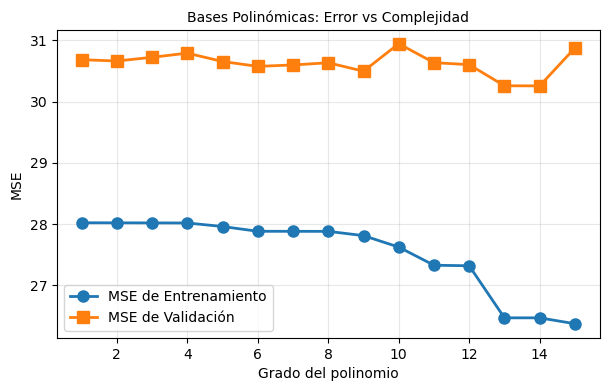

In [117]:
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
train_mse_poly, val_mse_poly = [], []

for deg in degrees:
    # Crear y ajustar la base
    poly_basis = PolyBasis(deg)
    Phi_train = poly_basis.fit_transform(X_train)
    
    # Resolver para obtener w
    w = solve_weights(Phi_train, t_train, lam=1e-3)
    
    # Predicción en entrenamiento: ŷ = Φ w
    y_train = Phi_train @ w
    
    # Transformar validación y predecir
    Phi_val = poly_basis.transform(X_val)
    y_val = Phi_val @ w
    
    # Calcular errores
    mse_train = mse(y_train, t_train)
    mse_val = mse(y_val, t_val)
    
    train_mse_poly.append(mse_train)
    val_mse_poly.append(mse_val)
    
# Visualizar resultados
plt.figure(figsize=(7, 4))
plt.plot(degrees, train_mse_poly, 'o-', label="MSE de Entrenamiento", linewidth=2, markersize=8)
plt.plot(degrees, val_mse_poly, 's-', label="MSE de Validación", linewidth=2, markersize=8)
plt.xlabel("Grado del polinomio", fontsize=10)
plt.ylabel("MSE", fontsize=10)
plt.title("Bases Polinómicas: Error vs Complejidad", fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

El MSE de entrenamiento disminuye a medida que aumenta el grado del polinomio. Esto indica que los modelos más complejos se ajustan un poco mejor a los datos de entrenamiento.  
El MSE de validación se mantiene relativamente constante, el mejor desempeño se encuentra para el grado 14 con un MSE de 30.25.

#### Experimentación con bases RBF

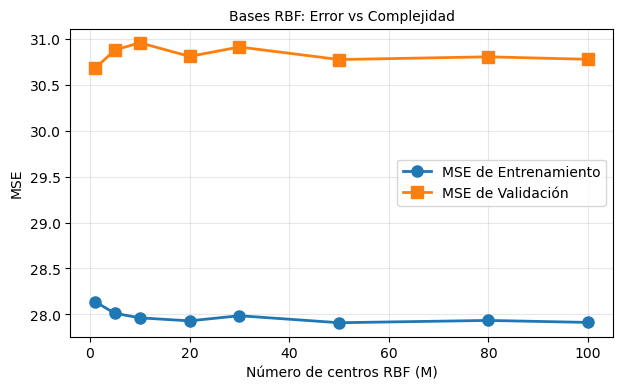

In [118]:
M_list = [1, 5, 10, 20, 30, 50, 80, 100]
train_mse_rbf, val_mse_rbf = [], []

np.random.seed(42)  # Reproducibilidad

for M in M_list:
    # Crear y ajustar la base
    rbf_basis = RBFBasis(M)
    Phi_train = rbf_basis.fit_transform(X_train)
    
    # Resolver para w
    w = solve_weights(Phi_train, t_train, lam=1e-3)
    
    # Predicciones
    y_train = Phi_train @ w
    Phi_val = rbf_basis.transform(X_val)
    y_val = Phi_val @ w
    
    # Errores
    mse_train = mse(y_train, t_train)
    mse_val = mse(y_val, t_val)
    
    train_mse_rbf.append(mse_train)
    val_mse_rbf.append(mse_val)

# Visualizar
plt.figure(figsize=(7, 4))
plt.plot(M_list, train_mse_rbf, 'o-', label="MSE de Entrenamiento", linewidth=2, markersize=8)
plt.plot(M_list, val_mse_rbf, 's-', label="MSE de Validación", linewidth=2, markersize=8)
plt.xlabel("Número de centros RBF (M)", fontsize=10)
plt.ylabel("MSE", fontsize=10)
plt.title("Bases RBF: Error vs Complejidad", fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

El MSE de entrenamiento se mantiene muy bajo, disminuye ligeramente hasta M=50 y luego aumenta minimamente. Esto sugiere que incluso con pocos centros, el modelo captura la estructura subyacente de los datos de entrenamiento.  
El MSE de validación se mantiene constante y relativamente alto, alrededor de 30.8. El mejor desempeño está en M=50.  
Similar a las bases polinómicas, hay una brecha constante entre entremaiento y validación.

#### Selección del mejor modelo

In [119]:
best_poly_deg = degrees[np.argmin(val_mse_poly)]
best_rbf_M = M_list[np.argmin(val_mse_rbf)]

print(f"\nMejor polinomio: grado {best_poly_deg}")
print(f"  Val MSE = {min(val_mse_poly):.6f}")

print(f"\nMejor RBF: M = {best_rbf_M}")
print(f"  Val MSE = {min(val_mse_rbf):.6f}")

# Elegir el mejor entre ambos
if min(val_mse_poly) <= min(val_mse_rbf):
    chosen = ("poly", best_poly_deg)
    print(f"\n>>> MODELO ELEGIDO: Polinomial grado {best_poly_deg}")
else:
    chosen = ("rbf", best_rbf_M)
    print(f"\n>>> MODELO ELEGIDO: RBF con M = {best_rbf_M}")


Mejor polinomio: grado 14
  Val MSE = 30.255633

Mejor RBF: M = 1
  Val MSE = 30.678036

>>> MODELO ELEGIDO: Polinomial grado 14


#### Entrenamiento final y predicción de Nuevas Salidas $\hat{t}$ (Validación)

Una vez que se obtiene el vector de coeficientes óptimo $\mathbf{w}$, el modelo puede usarse para predecir el valor de $t$ para cualquier nueva entrada $\mathbf{x}$ (por ejemplo, los 100 puntos del conjunto de validación).

La predicción $\hat{t}$ para un nuevo punto $\mathbf{x}$ se calcula mediante:
$$\hat{t} = y(\mathbf{x}, \mathbf{w})= \mathbf{w}^T\mathbf{\Phi}(\mathbf{x})$$

Aquí, $\mathbf{\Phi}(\mathbf{x})$ representa el vector de las funciones de base evaluadas en el nuevo punto $\mathbf{x}$. La evaluación de esta predicción sobre el conjunto de validación permite cuantificar la generalización del modelo (el objetivo clave en machine learning).

In [120]:
np.random.seed(42)

if chosen[0] == "poly":
    basis = PolyBasis(chosen[1])
    Phi_all = basis.fit_transform(X_all)
    w_final = solve_weights(Phi_all, t_all, lam=1e-3)
    Phi_unknown = basis.transform(X_unknown)
else:
    basis = RBFBasis(chosen[1])
    Phi_all = basis.fit_transform(X_all)
    w_final = solve_weights(Phi_all, t_all, lam=1e-3)
    Phi_unknown = basis.transform(X_unknown)

# Predicción: ŷ = w^T Φ(x)
y_unknown = Phi_unknown @ w_final

print(f"\nPredicciones calculadas: {y_unknown.shape[0]} ejemplos")
print(f"Primeras 5 predicciones:\n{y_unknown[:5].flatten()}")

# Guardar predicciones
np.savetxt("predicciones_unknown.txt", y_unknown, fmt="%.6f")
print("\n✓ Predicciones guardadas en 'predicciones_unknown.txt'")


Predicciones calculadas: 500 ejemplos
Primeras 5 predicciones:
[-0.93176143  2.30494627  3.24499063  2.95059127  1.39589186]

✓ Predicciones guardadas en 'predicciones_unknown.txt'


#### Análisis de residuos


Media de residuos: 0.000001
Desviación estándar: 5.200847
Residuo mínimo: -17.005948
Residuo máximo: 18.190268

Varianza del ruido estimada: σ² = 27.048812


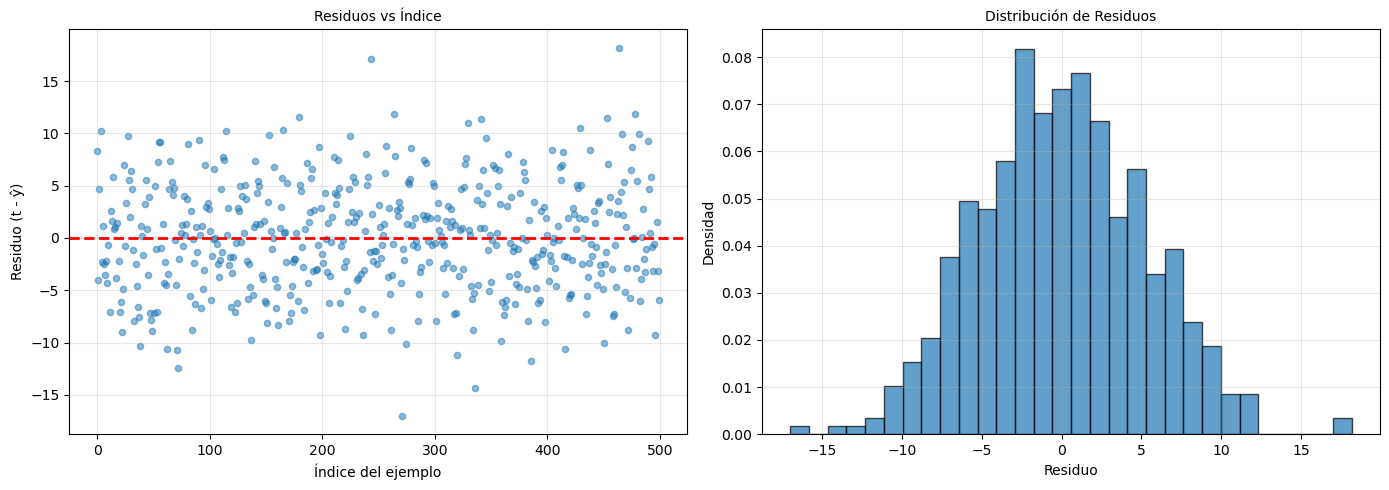

In [121]:
# Calcular residuos en todos los datos
y_all = Phi_all @ w_final
residuals = t_all - y_all

# Estadísticas
print(f"\nMedia de residuos: {np.mean(residuals):.6f}")
print(f"Desviación estándar: {np.std(residuals):.6f}")
print(f"Residuo mínimo: {np.min(residuals):.6f}")
print(f"Residuo máximo: {np.max(residuals):.6f}")

# Estimar varianza del ruido
sigma2 = np.var(residuals)
print(f"\nVarianza del ruido estimada: σ² = {sigma2:.6f}")

# Visualizar residuos
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(range(len(residuals)), residuals, alpha=0.5, s=20)
plt.axhline(0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Índice del ejemplo", fontsize=10)
plt.ylabel("Residuo (t - ŷ)", fontsize=10)
plt.title("Residuos vs Índice", fontsize=10)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, density=True, alpha=0.7, edgecolor='black')
plt.xlabel("Residuo", fontsize=10)
plt.ylabel("Densidad", fontsize=10)
plt.title("Distribución de Residuos", fontsize=10)
plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()

Los residuos (errores $t-\hat{y}$) se distribuyen de manera aparentemente aleatoria alrededor de cero (la línea roja). No se observa una tendencia clara ni un patrón que dependa del índice de la muestra.  
La distribución de los residuos se asemeja visualmente a una Distribución Gaussiana (en forma de campana) centrada en cero. Esto respalda la suposición fundamental del modelo de regresión lineal (mínimos cuadrados) de que el ruido (o error) $\epsilon$ sigue una distribución $N(0,\sigma^2I)$.

### Ejercicio 2.3

Determinar un modo de medir el sobre-ajuste y plotear la métrica de sesgo-varianza.

Para medir el sobreajuste (overfitting), Definimos una métrica basada en la brecha de generalización (Generalization Gap), calculada como la diferencia relativa entre el Error Cuadrático Medio (MSE) en el conjunto de validación y el MSE en el conjunto de entrenamiento:

$$\text{Métrica de Sobreajuste} = \frac{MSE_{\text{validación}} - MSE_{\text{entrenamiento}}}{MSE_{\text{entrenamiento}}}$$

Un valor creciente en esta métrica indica un aumento en el sobreajuste, sirviendo como un proxy directo para la varianza.

In [ ]:
# MEDICIÓN DEL SOBRE-AJUSTE
degrees = range(1, 16)
train_errors = []
val_errors = []
overfitting_metric = []

for deg in degrees:
    poly_basis = PolyBasis(deg)
    Phi_train = poly_basis.fit_transform(X_train)
    w = solve_weights(Phi_train, t_train, lam=1e-3)
    
    y_train = Phi_train @ w
    Phi_val = poly_basis.transform(X_val)
    y_val = Phi_val @ w
    
    mse_train = mse(y_train, t_train)
    mse_val = mse(y_val, t_val)
    
    train_errors.append(mse_train)
    val_errors.append(mse_val)
    
    # Métrica de sobre-ajuste: diferencia relativa entre MSE Validación y Entrenamiento
    overfitting = (mse_val - mse_train) / (mse_train + 1e-8)
    overfitting_metric.append(overfitting)

Para medir el sesgo y la varianza de un modelo, utilizamos la técnica de **Bootstrap** (generando 50 muestras de entrenamiento con reemplazo) para estimar las contribuciones fundamentales al error total: $\text{Sesgo}^2$ y $\text{Varianza}$. La descomposición sesgo-varianza es una herramienta analítica que descompone el error cuadrático esperado (Expected Squared Loss) de un predictor en tres componentes: $\text{Sesgo}^2$, $\text{Varianza}$ y ruido irreducible.

$$\text{Error Total} = \text{Sesgo}^2 + \text{Varianza} + \text{Ruido Irreducible}$$

In [ ]:
# ANÁLISIS SESGO-VARIANZA MEDIANTE BOOTSTRAP

n_bootstrap = 50  # Número de muestras bootstrap
test_degrees = [2, 4, 6, 8, 10, 12]

bias_squared = []
variance = []
total_error = []

for deg in test_degrees:
    predictions = []
    
    # Generar múltiples modelos con bootstrap
    for i in range(n_bootstrap):
        # Bootstrap: muestreo con reemplazo
        indices = np.random.choice(n_train, size=n_train, replace=True)
        X_boot = X_train[indices]
        t_boot = t_train[indices]
        
        # Entrenar modelo
        poly_basis = PolyBasis(deg)
        Phi_boot = poly_basis.fit_transform(X_boot)
        w_boot = solve_weights(Phi_boot, t_boot, lam=1e-3)
        
        # Predecir en validación

n_bootstrap = 50  # Número de muestras bootstrap
test_degrees = [2, 4, 6, 8, 10, 12]

bias_squared = []
variance = []
total_error = []

for deg in test_degrees:
    predictions = []
    
    # Generar múltiples modelos con bootstrap
    for i in range(n_bootstrap):
        # Bootstrap: muestreo con reemplazo
        indices = np.random.choice(n_train, size=n_train, replace=True)
        X_boot = X_train[indices]
        t_boot = t_train[indices]
        
        # Entrenar modelo
        poly_basis = PolyBasis(deg)
        Phi_boot = poly_basis.fit_transform(X_boot)
        w_boot = solve_weights(Phi_boot, t_boot, lam=1e-3)
        
        # Predecir en validación
        Phi_val_boot = poly_basis.transform(X_val)
        y_val_boot = Phi_val_boot @ w_boot
        predictions.append(y_val_boot)
    
    predictions = np.array(predictions)  # Shape: (n_bootstrap, n_val, 1)
    
    # Calcular estadísticas
    mean_pred = np.mean(predictions, axis=0)  # Predicción promedio
    
    # Sesgo^2: diferencia entre predicción promedio y valor real
    bias_sq = np.mean((mean_pred - t_val) ** 2)
    
    # Varianza: variabilidad de las predicciones
    var = np.mean(np.var(predictions, axis=0))
    
    # Error total en validación
    total_err = np.mean((predictions - t_val[np.newaxis, :, :]) ** 2)
    
    bias_squared.append(bias_sq)
    variance.append(var)
    total_error.append(total_err)

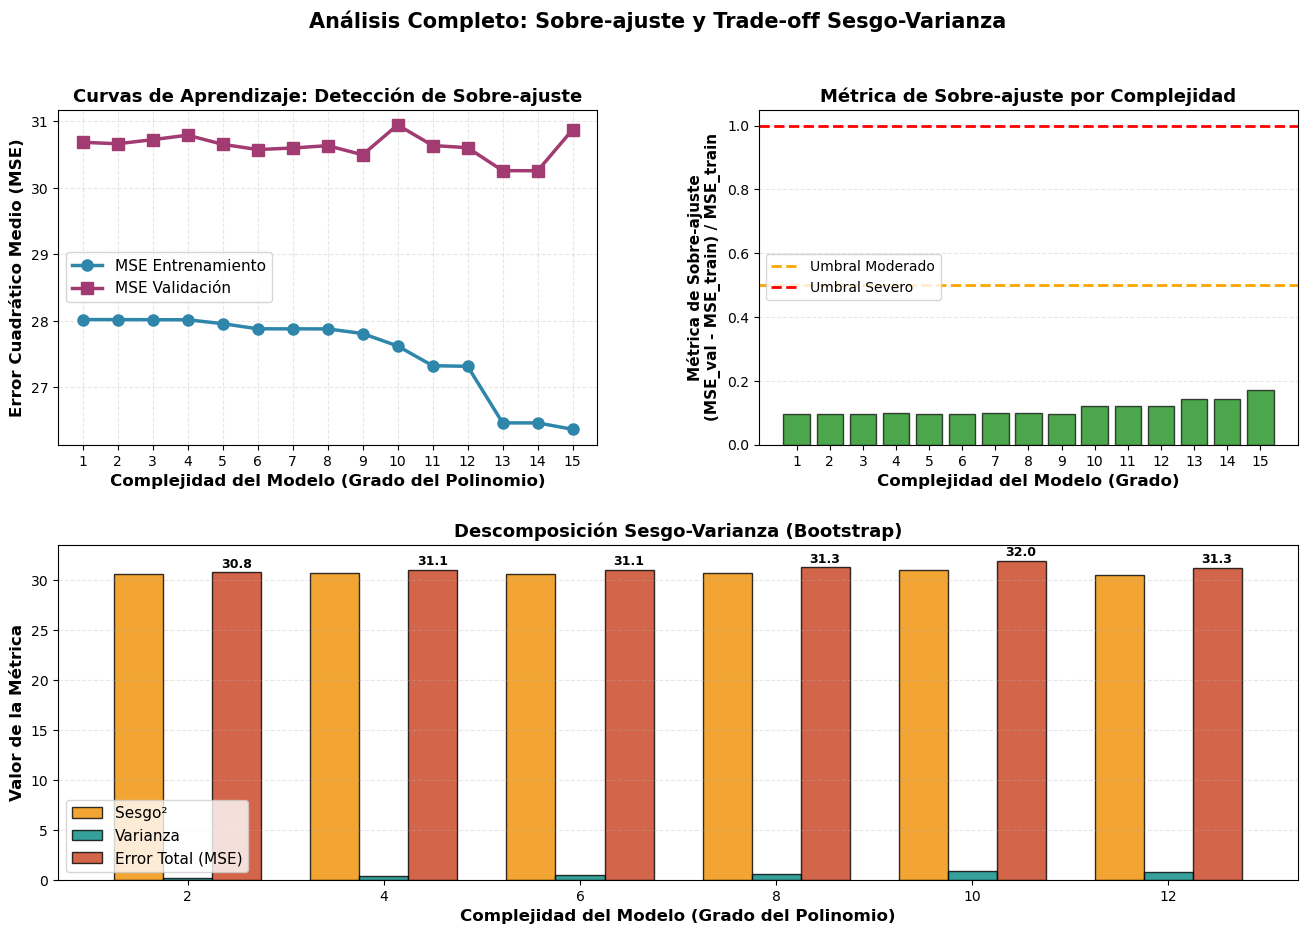

In [124]:
fig = plt.figure(figsize=(16, 10))
gs = GridSpec(2, 2, figure=fig, hspace=0.3, wspace=0.3)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(degrees, train_errors, 'o-', label='MSE Entrenamiento', 
         linewidth=2.5, markersize=8, color='#2E86AB')
ax1.plot(degrees, val_errors, 's-', label='MSE Validación', 
         linewidth=2.5, markersize=8, color='#A23B72')
ax1.set_xlabel('Complejidad del Modelo (Grado del Polinomio)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Error Cuadrático Medio (MSE)', fontsize=12, fontweight='bold')
ax1.set_title('Curvas de Aprendizaje: Detección de Sobre-ajuste', 
              fontsize=13, fontweight='bold')
ax1.legend(fontsize=11, loc='center left')
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xticks(degrees)

ax2 = fig.add_subplot(gs[0, 1])
colors = ['green' if x < 0.5 else 'orange' if x < 1.0 else 'red' 
          for x in overfitting_metric]
ax2.bar(degrees, overfitting_metric, color=colors, alpha=0.7, edgecolor='black')
ax2.axhline(0.5, color='orange', linestyle='--', linewidth=2, 
            label='Umbral Moderado')
ax2.axhline(1.0, color='red', linestyle='--', linewidth=2, 
            label='Umbral Severo')
ax2.set_xlabel('Complejidad del Modelo (Grado)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Métrica de Sobre-ajuste\n(MSE_val - MSE_train) / MSE_train', 
               fontsize=11, fontweight='bold')
ax2.set_title('Métrica de Sobre-ajuste por Complejidad', 
              fontsize=13, fontweight='bold')
ax2.legend(fontsize=10, loc='center left')
ax2.grid(True, alpha=0.3, axis='y', linestyle='--')
ax2.set_xticks(degrees)

ax3 = fig.add_subplot(gs[1, :])
width = 0.25
x_pos = np.arange(len(test_degrees))

ax3.bar(x_pos - width, bias_squared, width, label='Sesgo²', 
        color='#F18F01', alpha=0.8, edgecolor='black')
ax3.bar(x_pos, variance, width, label='Varianza', 
        color='#048A81', alpha=0.8, edgecolor='black')
ax3.bar(x_pos + width, total_error, width, label='Error Total (MSE)', 
        color='#C73E1D', alpha=0.8, edgecolor='black')

ax3.set_xlabel('Complejidad del Modelo (Grado del Polinomio)', 
               fontsize=12, fontweight='bold')
ax3.set_ylabel('Valor de la Métrica', fontsize=12, fontweight='bold')
ax3.set_title('Descomposición Sesgo-Varianza (Bootstrap)', 
              fontsize=13, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(test_degrees)
ax3.legend(fontsize=11, loc='lower left')
ax3.grid(True, alpha=0.3, axis='y', linestyle='--')

for i, deg in enumerate(test_degrees):
    total = total_error[i]
    ax3.text(i + width, total + 0.5, f'{total:.1f}', 
             ha='center', fontsize=9, fontweight='bold')

plt.suptitle('Análisis Completo: Sobre-ajuste y Trade-off Sesgo-Varianza', 
             fontsize=15, fontweight='bold', y=0.98)

plt.show()

In [125]:
best_deg_idx = np.argmin(val_errors)
best_deg = list(degrees)[best_deg_idx]
print(f"✓ Mejor modelo: Grado {best_deg}")
print(f"  - MSE Entrenamiento: {train_errors[best_deg_idx]:.4f}")
print(f"  - MSE Validación: {val_errors[best_deg_idx]:.4f}")
print(f"  - Métrica Sobre-ajuste: {overfitting_metric[best_deg_idx]:.4f}")

worst_deg_idx = np.argmax(overfitting_metric)
worst_deg = list(degrees)[worst_deg_idx]
print(f"\n✗ Modelo más sobreajustado: Grado {worst_deg}")
print(f"  - Métrica Sobre-ajuste: {overfitting_metric[worst_deg_idx]:.4f}")

✓ Mejor modelo: Grado 14
  - MSE Entrenamiento: 26.4671
  - MSE Validación: 30.2556
  - Métrica Sobre-ajuste: 0.1431

✗ Modelo más sobreajustado: Grado 15
  - Métrica Sobre-ajuste: 0.1708


Los gráficos superiores (MSE vs. Complejidad y Métrica de Sobreajuste) muestran el comportamiento del error a medida que aumenta la complejidad del modelo (grado del polinomio). Típicamente, el MSE de Entrenamiento disminuye a medida que aumenta la complejidad.
El MSE de Validación debe disminuir inicialmente (reduciendo el sesgo) hasta alcanzar un mínimo, y luego comenzar a aumentar si el modelo se sobreajusta, capturando el ruido específico del conjunto de entrenamiento. Según los resultados numéricos del experimento, el mejor modelo se encuentra en el Grado 14, logrando un MSE de Validación de $30.2556$. El modelo más sobreajustado encontrado en este rango es el de Grado 15, con una Métrica de sobreajuste de $0.1708$.  
El gráfico de la métrica de sobreajuste indica que el grado 14 ($0.1431$) es preferible al grado 15, ya que tiene un error de generalización ligeramente menor. Es notable que ambos valores están muy por debajo de los umbrales de sobreajuste moderado ($0.5$) y severo ($1.0$) utilizados para la visualización.

En el gráfico inferior se observa que a baja complejidad (ej., Grado 2), el sesgo es alto, lo que indica que el modelo es demasiado simple para capturar la estructura subyacente de los datos (subajuste o underfitting).
A medida que aumenta el grado del polinomio, el sesgo disminuye, ya que la mayor flexibilidad permite que el modelo promedio se ajuste mejor a la función generadora de datos.

La varianza mide la sensibilidad del modelo a las fluctuaciones en el conjunto de datos de entrenamiento.
En el gráfico, se observa que a baja complejidad (ej., Grado 2), la varianza es baja, ya que el modelo es rígido y los diferentes conjuntos de entrenamiento producen resultados similares. A medida que la complejidad aumenta (ej., Grado 12), la varianza aumenta considerablemente. Esto significa que el modelo es excesivamente flexible y se ajusta en exceso al ruido específico de cada muestra de entrenamiento de bootstrap.

El error total (MSE) es la suma del $\text{sesgo}^2$ y la $\text{varianza}$ (más el ruido irreducible).
El análisis bootstrap confirma el trade-off sesgo-varianza. El objetivo es encontrar el punto de complejidad donde la disminución del sesgo se equilibra con el aumento de la varianza, minimizando el error total.

### Ejercicio 2.4
Representar $p(D|x,\mathbf{w})$ en gráfica para cada caso.

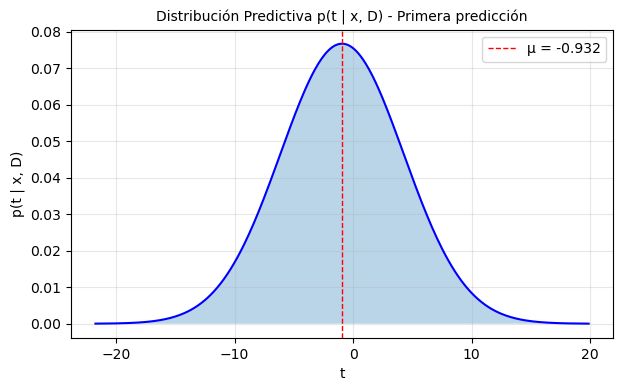

In [126]:
# Distribución predictiva para la primera predicción desconocida
if sigma2 > 0 and not np.isnan(sigma2):
    mu = y_unknown[0, 0]
    std = np.sqrt(sigma2)
    
    plt.figure(figsize=(7, 4))
    xs = np.linspace(mu - 4*std, mu + 4*std, 300)
    pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((xs - mu) / std)**2)
    
    plt.plot(xs, pdf, linewidth=1.5, color='blue')
    plt.axvline(mu, color='red', linestyle='--', linewidth=1, label=f'μ = {mu:.3f}')
    plt.fill_between(xs, pdf, alpha=0.3)
    
    plt.xlabel("t", fontsize=10)
    plt.ylabel("p(t | x, D)", fontsize=10)
    plt.title("Distribución Predictiva p(t | x, D) - Primera predicción", 
              fontsize=10)
    plt.legend(fontsize=10); plt.grid(True, alpha=0.3); plt.show()